In [2]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("dataset/Cleaned_Reviews.csv")

# Display shape and first few rows
print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

Dataset loaded successfully!
Shape: (568454, 5)


,ProductId,UserId,Score,Review,Cleaned_Review
0,B001E4KFG0,A3SGXH7AUHU8GW,5,Good Quality Dog Food I have bought several of...,good quality dog food bought several vitality ...
1,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised Product arrived labeled as J...,advertised product arrived labeled jumbo salte...
2,B000LQOCH0,ABXLMWJIXXAIN,4,"""Delight"" says it all This is a confection tha...",delight say confection around century light pi...
3,B000UA0QIQ,A395BORC6FGVXV,2,Cough Medicine If you are looking for the secr...,cough medicine looking secret ingredient robit...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy Great taffy at a great price. The...,great taffy great taffy great price wide assor...


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs, numbers, and special chars (keep emojis)
    text = re.sub(r'http\S+|www\S+|[^a-zA-Z\s]', '', text)

    # Tokenize
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [w for w in words if w not in stop_words]

    # Lemmatize
    words = [lemmatizer.lemmatize(w) for w in words]

    # Rejoin
    return " ".join(words)

# Apply cleaning to the Review column
df['Cleaned_Review'] = df['Review'].apply(clean_text)

print("Text preprocessing complete!")
df[['Review', 'Cleaned_Review']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Text preprocessing complete!


,Review,Cleaned_Review
0,Good Quality Dog Food I have bought several of...,good quality dog food bought several vitality ...
1,Not as Advertised Product arrived labeled as J...,advertised product arrived labeled jumbo salte...
2,"""Delight"" says it all This is a confection tha...",delight say confection around century light pi...
3,Cough Medicine If you are looking for the secr...,cough medicine looking secret ingredient robit...
4,Great taffy Great taffy at a great price. The...,great taffy great taffy great price wide assor...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # limit to top 5000 features for speed

# Transform the cleaned reviews
X = tfidf.fit_transform(df['Cleaned_Review'])

print("TF-IDF vectorization complete!")
print("Shape of TF-IDF matrix:", X.shape)


TF-IDF vectorization complete!
Shape of TF-IDF matrix: (568454, 5000)


In [5]:
from sklearn.model_selection import train_test_split

# Convert Score to sentiment labels
# 1,2 → Negative | 3 → Neutral | 4,5 → Positive
def get_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Score'].apply(get_sentiment)

# Define features (X) and target (y)
y = df['Sentiment']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split complete!")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
print("\nSentiment distribution:")
print(df['Sentiment'].value_counts())


Data split complete!
Training samples: 454763
Testing samples: 113691

Sentiment distribution:
Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64


In [9]:
import pandas as pd

df = pd.read_csv("dataset/Cleaned_Reviews.csv")
print(df.columns.tolist())


['ProductId', 'UserId', 'Score', 'Review', 'Cleaned_Review']


Sample columns: ['ProductId', 'UserId', 'Score', 'Review', 'Cleaned_Review', 'Sentiment']
Total rows: 568454

Sentiment distribution:
Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64

Preview:
                                      Cleaned_Review  Score Sentiment
0  good quality dog food bought several vitality ...      5  Positive
1  advertised product arrived labeled jumbo salte...      1  Negative
2  delight say confection around century light pi...      4  Positive

Data split complete!
Training samples: 454763
Testing  samples: 113691

--------------------------------------------------
 LOGISTIC REGRESSION - METRICS
--------------------------------------------------
Training Accuracy : 89.82%
Testing  Accuracy : 88.65%

Classification report (test):
              precision    recall  f1-score   support

    Negative       0.77      0.80      0.78     16407
     Neutral       0.47      0.53      0.50      8528
    Positive       0.96      

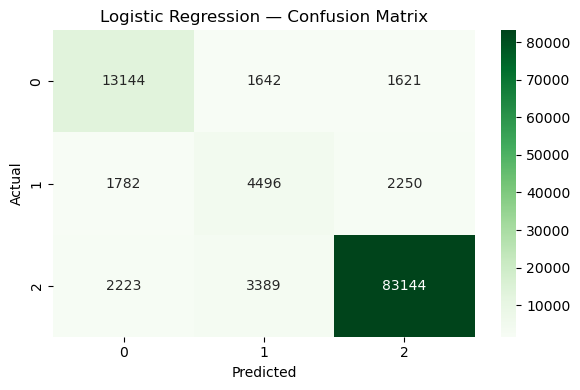

Model and vectorizer saved to 'model/' folder.
--------------------------------------------------


In [12]:
# ---------------------------------------------------------------------
# 01 ----- Map numeric score to sentiment labels & quick sanity checks
# ---------------------------------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# load (you already confirmed file exists)
df = pd.read_csv("dataset/Cleaned_Reviews.csv")

# map Score -> Sentiment: 1,2 -> Negative | 3 -> Neutral | 4,5 -> Positive
def map_score_to_sentiment(s):
    if s <= 2:
        return "Negative"
    elif s == 3:
        return "Neutral"
    else:
        return "Positive"

df["Sentiment"] = df["Score"].apply(map_score_to_sentiment)

# quick checks
print("Sample columns:", df.columns.tolist())
print("Total rows:", len(df))
print("\nSentiment distribution:")
print(df["Sentiment"].value_counts())

# ---------------------------------------------------------------------
# 02 ----- Prepare features and labels
# ---------------------------------------------------------------------
# Use cleaned text column that you confirmed exists
X = df["Cleaned_Review"].astype(str)   # ensure string dtype
y = df["Sentiment"]

# show tiny preview
print("\nPreview:")
print(df[["Cleaned_Review", "Score", "Sentiment"]].head(3))

# ---------------------------------------------------------------------
# 03 ----- TF-IDF vectorization
# ---------------------------------------------------------------------
tfidf = TfidfVectorizer(max_features=15000, ngram_range=(1,2), min_df=5)
X_tfidf = tfidf.fit_transform(X)

# ---------------------------------------------------------------------
# 04 ----- Train/test split (80/20)
# ---------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.20, random_state=42, stratify=y
)

print("\nData split complete!")
print("Training samples:", X_train.shape[0])
print("Testing  samples:", X_test.shape[0])

# ---------------------------------------------------------------------
# 05 ----- Train Logistic Regression (final model)
# ---------------------------------------------------------------------
log_reg = LogisticRegression(max_iter=2000, solver="liblinear", class_weight="balanced", random_state=42)
log_reg.fit(X_train, y_train)

# ---------------------------------------------------------------------
# 06 ----- Evaluate model (train & test metrics)
# ---------------------------------------------------------------------
y_train_pred = log_reg.predict(X_train)
y_test_pred  = log_reg.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("\n--------------------------------------------------")
print(" LOGISTIC REGRESSION - METRICS")
print("--------------------------------------------------")
print(f"Training Accuracy : {train_acc * 100:.2f}%")
print(f"Testing  Accuracy : {test_acc  * 100:.2f}%\n")
print("Classification report (test):")
print(classification_report(y_test, y_test_pred))

# ---------------------------------------------------------------------
# 07 ----- Confusion matrix plot
# ---------------------------------------------------------------------
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 08 ----- Persist model and TF-IDF for inference
# ---------------------------------------------------------------------
joblib.dump(log_reg,  "model/logistic_regression_model.pkl")
joblib.dump(tfidf,     "model/tfidf_vectorizer.pkl")
print("Model and vectorizer saved to 'model/' folder.")
print("--------------------------------------------------")
